 Analysis based on  COVID-19 data set / Data last updated March 27

In [179]:
from datascience import *
import numpy as np

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

#Pulling data from John Hopkins dataset
data1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-28-2020.csv'

#Grab DATA and assign to a variable :)
today = Table.read_table(data1)

In [180]:
#Aggregate Global cases
print ("Confirmed cases Worldwide")
np.sum(today.column('Confirmed'))

Confirmed cases Worldwide


660706

In [303]:
#Totals by Country
todaybycountry=today.where('Country_Region',are.equal_to('US'))

print ("Confirmed cases by Country")
np.sum(todaybycountry.column('Confirmed'))

Confirmed cases by Country


121478

In [304]:

#Filter US Data
print ("Let's look at US city data only as of March 24")
todayall=today.where('Country_Region', are.equal_to('US')).sort('Deaths', descending='true')
todayall.where('Confirmed',are.above(0)).sort('Confirmed', descending='true')

Let's look at US city data only as of March 24


FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
36061,New York City,New York,US,2020-03-28 23:05:37,40.7673,-73.9715,29776,517,0,0,"New York City, New York, US"
36119,Westchester,New York,US,2020-03-28 23:05:37,41.1628,-73.7574,7875,10,0,0,"Westchester, New York, US"
36059,Nassau,New York,US,2020-03-28 23:05:37,40.7407,-73.5894,5537,27,0,0,"Nassau, New York, US"
36103,Suffolk,New York,US,2020-03-28 23:05:37,40.8832,-72.8012,4138,30,0,0,"Suffolk, New York, US"
17031,Cook,Illinois,US,2020-03-28 23:05:37,41.8414,-87.8166,2613,28,0,0,"Cook, Illinois, US"
nan,Unassigned,New Jersey,US,2020-03-28 23:05:37,0,0,2478,86,0,0,"Unassigned, New Jersey, US"
26163,Wayne,Michigan,US,2020-03-28 23:05:37,42.281,-83.2813,2316,46,0,0,"Wayne, Michigan, US"
53033,King,Washington,US,2020-03-28 23:05:37,47.4914,-121.835,2077,136,0,0,"King, Washington, US"
36087,Rockland,New York,US,2020-03-28 23:05:37,41.1503,-74.0256,1896,8,0,0,"Rockland, New York, US"
34003,Bergen,New Jersey,US,2020-03-28 23:05:37,40.9601,-74.0716,1838,13,0,0,"Bergen, New Jersey, US"


In [298]:
#Drill into a State
#Look at a state like Texas where Confirmed cases are above 5.

State=today.where('Province_State', are.equal_to('Oregon'))
xy=State.where('Confirmed', are.above(5)).sort('Confirmed', descending='true')
xy.show()

FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
41067,Washington,Oregon,US,2020-03-28 23:05:37,45.5597,-123.096,140,3,0,0,"Washington, Oregon, US"
41047,Marion,Oregon,US,2020-03-28 23:05:37,44.9029,-122.582,94,3,0,0,"Marion, Oregon, US"
41051,Multnomah,Oregon,US,2020-03-28 23:05:37,45.5475,-122.417,81,2,0,0,"Multnomah, Oregon, US"
41005,Clackamas,Oregon,US,2020-03-28 23:05:37,45.1879,-122.218,36,2,0,0,"Clackamas, Oregon, US"
41043,Linn,Oregon,US,2020-03-28 23:05:37,44.489,-122.537,32,1,0,0,"Linn, Oregon, US"
41017,Deschutes,Oregon,US,2020-03-28 23:05:37,43.9157,-121.229,20,0,0,0,"Deschutes, Oregon, US"
41071,Yamhill,Oregon,US,2020-03-28 23:05:37,45.2333,-123.309,13,1,0,0,"Yamhill, Oregon, US"
41053,Polk,Oregon,US,2020-03-28 23:05:37,44.9032,-123.413,11,0,0,0,"Polk, Oregon, US"
41039,Lane,Oregon,US,2020-03-28 23:05:37,43.9373,-122.848,9,1,0,0,"Lane, Oregon, US"
41029,Jackson,Oregon,US,2020-03-28 23:05:37,42.432,-122.729,8,0,0,0,"Jackson, Oregon, US"


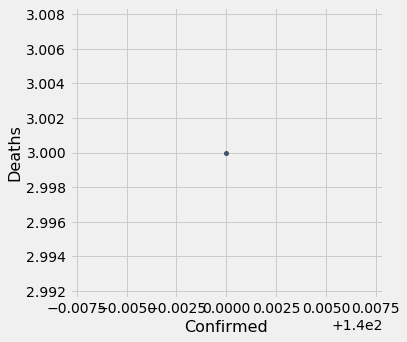

In [299]:
xyz=State.where('Confirmed', are.above(100)).sort('Confirmed', descending='true')

xyz.scatter('Confirmed', 'Deaths')

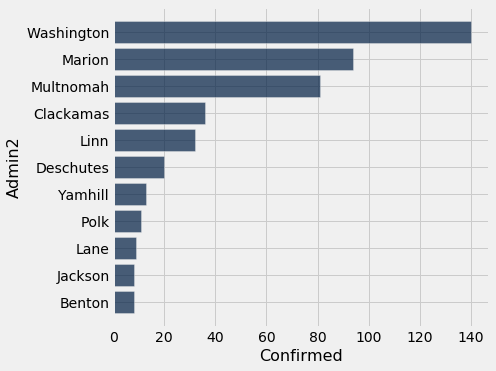

In [300]:
xy.barh('Admin2', 'Confirmed')


In [301]:
print ("Confirmed cases in state")
np.sum(xy.column('Confirmed'))

Confirmed cases in state


452

In [191]:
Circle.map_table(State.select('Lat', 'Long_', 'Admin2'), radius='2')

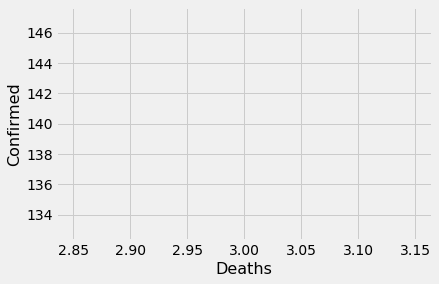

In [305]:

#xyz
xyz.select('Deaths','Confirmed').plot('Deaths')



In [238]:
#Look at Time series trend
path_data='/Users/jacob/GCloud/'

UStimeseries = Table.read_table(path_data + 'USTimeSeries.csv')

In [257]:
UStimeseries.sort('Deaths', descending='true').show()

Date,Date2,Confirmed,Deaths
03-28,2020-03-28,121478,2026
03-27,2020-03-27,101657,1581
03-26,2020-03-26,83836,1209
03-25,2020-03-25,65778,942
03-24,2020-03-24,53740,706
03-23,2020-03-23,43847,557
03-22,2020-03-22,33276,417
03-21,2020-03-21,25489,307
03-20,2020-03-20,19100,244
03-19,2020-03-19,13677,200


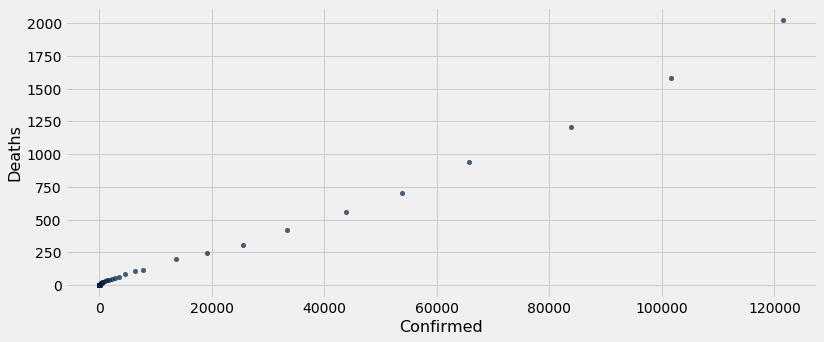

In [240]:
UStimeseries.scatter('Confirmed', 'Deaths', width=12, height=5)

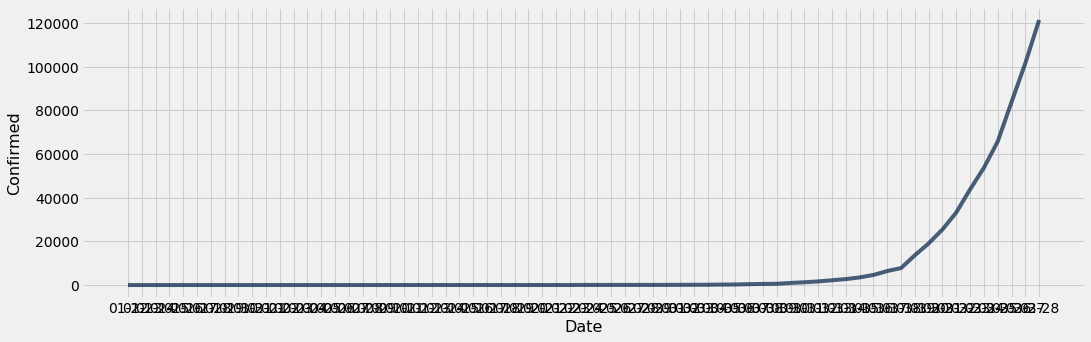

In [256]:
UStimeseries.plot('Date','Confirmed', width=16, height=5)

In [264]:

#calculate the death rate as a percentage of Confirmed cases and make a new colmumn
USTimeSeries1 = UStimeseries.with_columns('Mortality Rate', UStimeseries.column('Deaths')/UStimeseries.column('Confirmed')*100)
USTimeSeries1.sort('Deaths', descending='true')

Date,Date2,Confirmed,Deaths,Mortality Rate
03-28,2020-03-28,121478,2026,1.66779
03-27,2020-03-27,101657,1581,1.55523
03-26,2020-03-26,83836,1209,1.4421
03-25,2020-03-25,65778,942,1.43209
03-24,2020-03-24,53740,706,1.31373
03-23,2020-03-23,43847,557,1.27033
03-22,2020-03-22,33276,417,1.25316
03-21,2020-03-21,25489,307,1.20444
03-20,2020-03-20,19100,244,1.27749
03-19,2020-03-19,13677,200,1.46231


In [274]:
Deathsa = make_array(USTimeSeries1['Deaths'])
Deathsa

67

In [283]:
#Calculate how many deaths increase from previous day
deathmovement=np.diff(Deathsa)
#Just insert zero to the end of array to offset column size
deathmovement1=np.insert(deathmovement,0,0)
deathmovement1

NewUSTimeSeries=USTimeSeries1.with_column('Death increase', deathmovement1)
NewUSTimeSeries.sort('Deaths', descending='true').show()

Date,Date2,Confirmed,Deaths,Mortality Rate,Death increase
03-28,2020-03-28,121478,2026,1.66779,445
03-27,2020-03-27,101657,1581,1.55523,372
03-26,2020-03-26,83836,1209,1.4421,267
03-25,2020-03-25,65778,942,1.43209,236
03-24,2020-03-24,53740,706,1.31373,149
03-23,2020-03-23,43847,557,1.27033,140
03-22,2020-03-22,33276,417,1.25316,110
03-21,2020-03-21,25489,307,1.20444,63
03-20,2020-03-20,19100,244,1.27749,44
03-19,2020-03-19,13677,200,1.46231,82


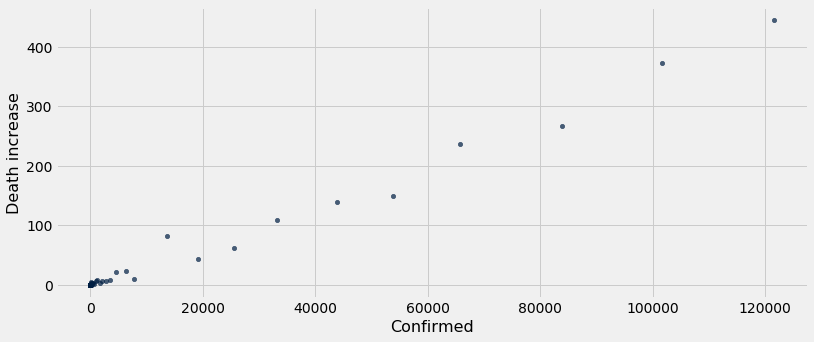

In [289]:
NewUSTimeSeries.scatter('Confirmed', 'Death increase', width=12, height=5)

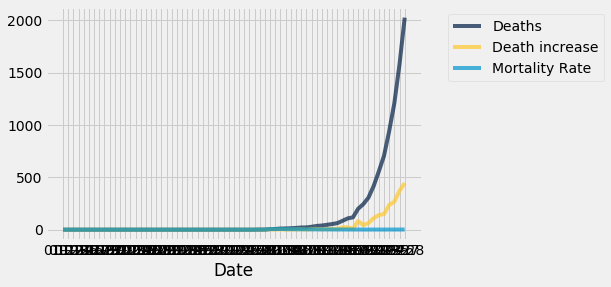

In [296]:
x= NewUSTimeSeries.select('Deaths','Death increase', 'Mortality Rate', 'Date')
x.plot('Date')

In [307]:
path_data='/Users/jacob/GCloud/'

NYCAge = Table.read_table(path_data + 'NYCage.csv')

In [318]:
print ("NYC Deaths data by underlying conditon and age dimension :")
NYCAge

NYC Deaths data by underlying conditon and age dimension :


Age,Yes,No,Pending
0-17,0,0,0
18-44,23,1,8
45-64,125,8,28
65-74,125,2,31
75 and over,254,6,61


NYC data -- plot Deaths underlying conditon (e.g.: Yes,No, Pending) by Age:


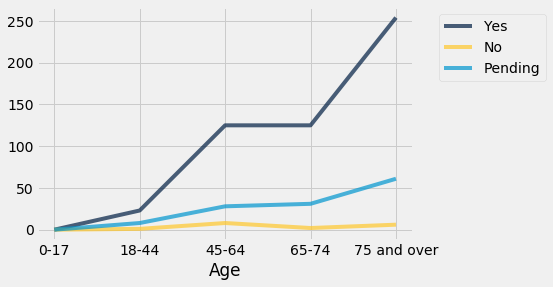

In [319]:
print ("NYC data -- plot Deaths underlying conditon (e.g.: Yes,No, Pending) by Age:")
NYCAge.plot('Age')

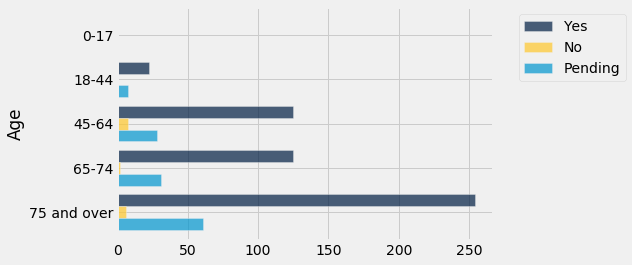

In [320]:
NYCAge.barh('Age')